# Librerías

In [1]:
#=================================
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from array import *
import scipy.stats as stats
import math
#=================================
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#=================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.datasets
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
#=================================
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Los datos

## Carga de datos y descripción

In [2]:
df = pd.DataFrame()
X = [15.1,11.3,7.8,10.1,10.3,6.8,3.1,6.2,10.7,13.9,
              6.2,5.3,10.3,7.1,2.3,4.5,10.6,13.2,2.7,8.5,
              3.3,11.1,2.3,12.5,9.3,5,2.9,11.5,3.3,5.2,
              9.7,10.9,11.1,1.4,7.4,6.4,4.2,6.1,2.4,11.6,
              1.7,11,12.2,4.5,5.5,9.5,4.3,6.7,3,6.9]

y = [69.05,69.31,70.55,70.66,71.71,72.06,72.48,70.06,70.66,68.54,
            73.6,71.87,70.14,70.88,72.56,72.58,70.1,68.76,70.39,70.22,
            71.83,70.63,72.96,68.09,70.69,70.56,72.6,69.03,71.23,70.93,
            70.32,70.55,69.21,72.78,70.82,71.42,72.13,70.43,71.9,67.96,
            72.08,70.11,70.9,72.9,71.64,70.08,71.72,69.48,72.48,70.29]


df['X'] = X
df['y'] = y

del X, y

In [3]:
df.head()

,X,y
0,15.1,69.05
1,11.3,69.31
2,7.8,70.55
3,10.1,70.66
4,10.3,71.71


Información de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


Descripción de los datos

In [5]:
df.describe()

,X,y
count,50.00000,50.000000
mean,7.37800,70.878600
std,3.69154,1.342394
min,1.40000,67.960000
25%,4.35000,70.117500
50%,6.85000,70.675000
75%,10.67500,71.892500
max,15.10000,73.600000


## Análisis gráfico y correlación

Relación gráfica

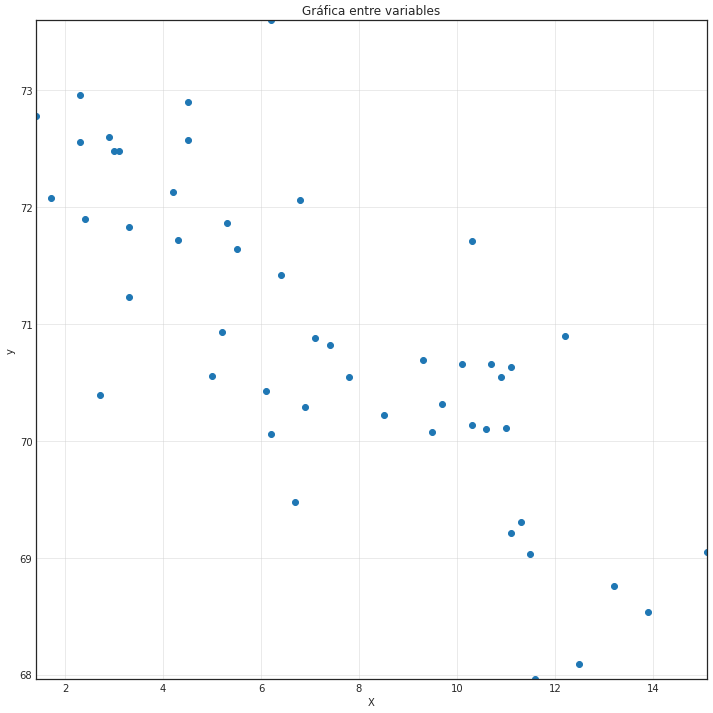

In [6]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(df['X'], df['y'])
    plt.title('Gráfica entre variables')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.ylim(min(df['y']), max(df['y']))
    plt.xlim(min(df['X']), max(df['X']))
    plt.grid(True, alpha = 0.5)
    plt.tight_layout()
plt.show()

Correlación entre variables

In [7]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [8]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,X,y,-0.780846,0.780846
2,y,X,-0.780846,0.780846


Histograma y Correlacion

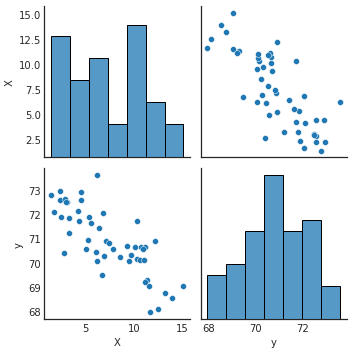

In [9]:
with plt.style.context('seaborn-white'):
    sns.pairplot(df, height=2.5)
    plt.tight_layout()
    plt.grid()
plt.show()

## Preparación de datos

In [10]:
# separar variable respuesta del dataset
y = df["y"].copy()
X = df.drop(["y"], axis=1)

Creación de conjunto de entrenamiento y de prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.90,
                                        random_state = 42,
                                        shuffle      = False)

# El modelo

## Ajuste del modelo

In [12]:
W = pd.concat([X_train, y_train], axis = 1)
lm = ols("y ~ X", W)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     70.38
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           1.34e-10
Time:                        11:36:52   Log-Likelihood:                -55.562
No. Observations:                  45   AIC:                             115.1
Df Residuals:                      43   BIC:                             118.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.0204      0.284    256.874      0.0

Al ver la columna del p.valor para cada coefienciente se concluye que no son nulos.

## Bondad de ajuste

In [13]:
# predicciones
pred_train = lm.fittedvalues
rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = pred_train,
        squared = False
       )
print("")
print(f"El error (rmse) en el conjunto de entrenamiento es: {round(rmse,4)}")


El error (rmse) en el conjunto de entrenamiento es: 0.8317


In [14]:
# predicciones
pred_test = lm.predict(X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred_test,
        squared = False
       )
print("")
print(f"El error (rmse) en el conjunto de prueba es: {round(rmse,4)}")


El error (rmse) en el conjunto de prueba es: 0.8304


# Análisis de residuos

## Normalidad

In [15]:
residuos_train = lm.resid

<Figure size 1440x1440 with 0 Axes>

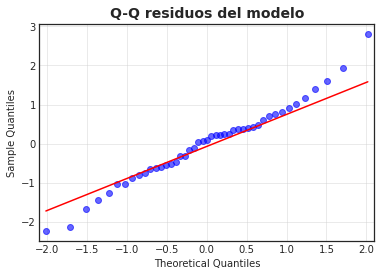

In [16]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))

    sm.qqplot(
        residuos_train,
        fit   = True,
        line  = 'q',
        color = "blue",#'firebrick',
        alpha = 0.6,
        lw    = 2
    )

    plt.title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

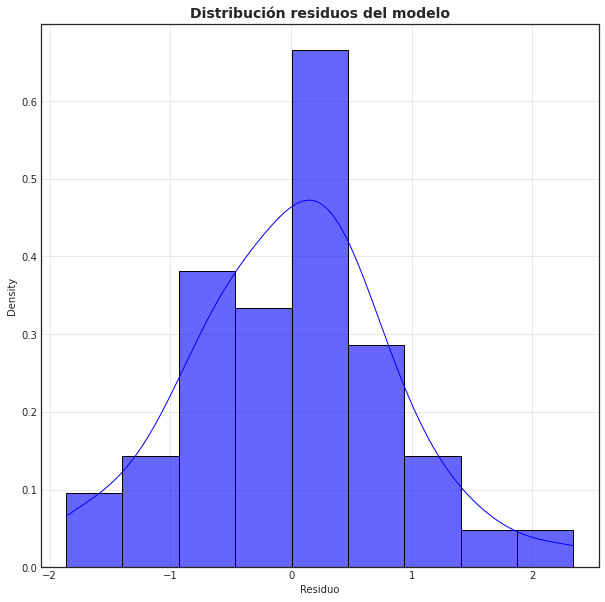

In [17]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",#"firebrick",
        alpha   = 0.6
    )

    plt.title('Distribución residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [18]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
k1, p_value = stats.shapiro(residuos_train)
print(f"Shapiro test: Estadístico= {k1}, p-value = {p_value}")

Shapiro test: Estadístico= 0.986003577709198, p-value = 0.8556990027427673


Test de Shapiro-Wilk

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

In [19]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino's K-squared test: Estadístico= {k2}, p-value = {p_value}")

D'Agostino's K-squared test: Estadístico= 1.364230149749575, p-value = 0.5055465918815216


Test de D'Agostino's K-cuadrado

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Residuos con media cero

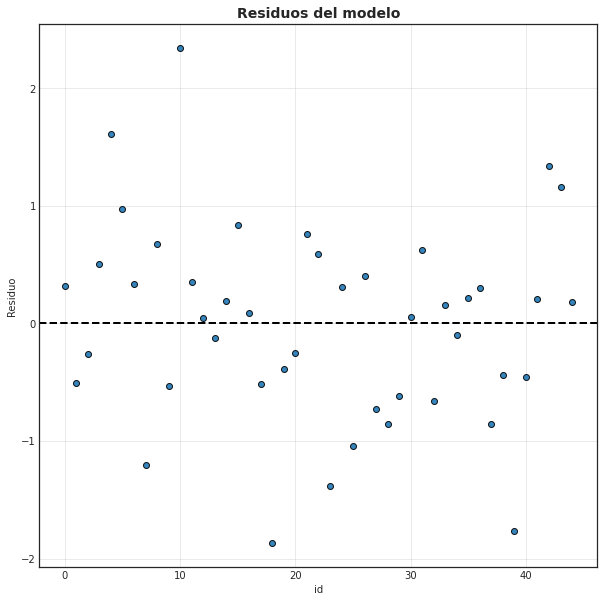

In [20]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('id')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [21]:
med_res = round(np.mean(residuos_train),2)
print(f"La media de los residuos es {med_res}")

La media de los residuos es -0.0


## Homocedasticidad

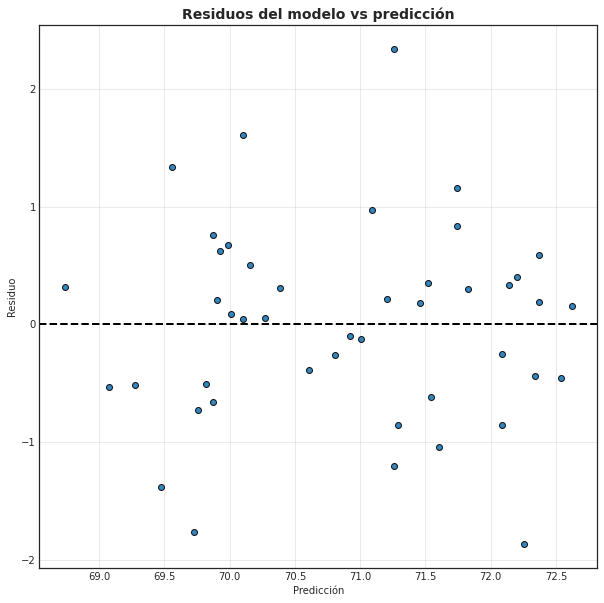

In [22]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(pred_train, residuos_train, edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo vs predicción', fontsize = 14, fontweight = "bold")
    plt.xlabel('Predicción')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [23]:
p_value = sms.het_breuschpagan(resid = lm.resid, exog_het = lm.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(p_value))

El resultado del test Breusch-Pagan es: p.valor = 0.840


Test de Breusch-Pagan

$H_0$: La homocedastidad está presente

$H_1$: La heterocedastidad está presente

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Independencia

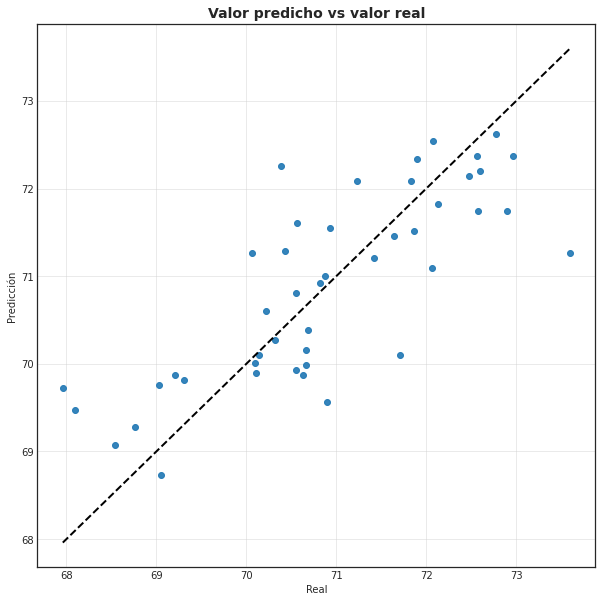

In [24]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, pred_train, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [25]:
est_dw = round(durbin_watson(residuos_train),2)

print(f"El resultado del test de Durbin-Watson es: Estadístico = {est_dw}")


El resultado del test de Durbin-Watson es: Estadístico = 1.69


Test de Durbin-Watson

$H_0$: Los residuos son independientes

$H_1$: Los residuos no son independientes

El estadístico se encuentra entre 1.5 y 2.5, no se rechaza la hipótesis nula.

# Análisis de outliers y puntos influyentes

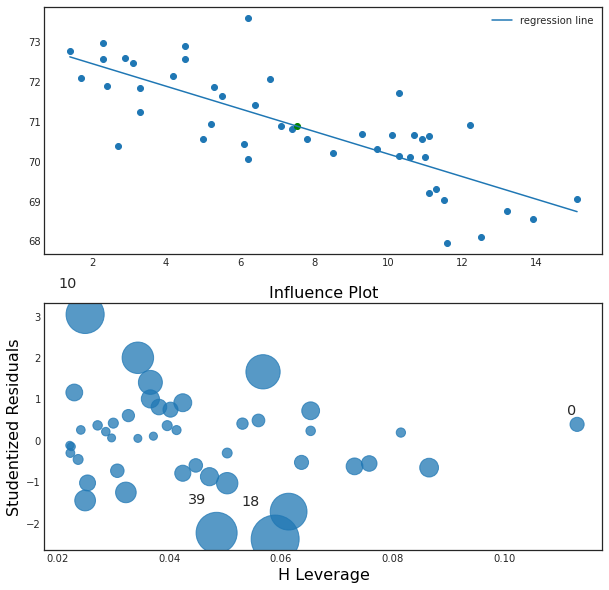

In [26]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax.scatter(np.sort(X_train['X']), y_train[np.argsort(X_train['X'])])
    #ax.scatter(30, 10, color = "red")
    ax.scatter(np.mean(X_train), np.mean(y_train), color = "green")
    #ax.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
    ax.plot(np.sort(X_train['X']), lm.predict()[np.argsort(X_train['X'])], label = "regression line")
    ax.legend()

    sm.graphics.influence_plot(lm, ax = ax2, criterion="cooks")
plt.show()

# Modelo y predicciones

Parámetros del modelo

In [27]:
print('Parámetros: \n', lm.params)

Parámetros: 
 Intercept    73.020424
X            -0.283720
dtype: float64


Recta de regresión:

$y =  73.020424 -0.283720*X$

Error estándar

In [28]:
print('Standard errors: \n', lm.bse)

Standard errors: 
 Intercept    0.284265
X            0.033820
dtype: float64


Valor de $R^2$

In [29]:
print('El valor de R^2 es:', round(lm.rsquared,4))

El valor de R^2 es: 0.6207


Intervalo de confianza

In [30]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = lm.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,72.447149,73.593700
X,-0.351923,-0.215516


Estimador de la varianza

In [31]:
y_rest = (y_train - pred_train)**2
yMLE = sum(y_rest)/(len(y_train))
print("El valor por MLE es:", round(yMLE,4))

El valor por MLE es: 0.6918


In [32]:
yOLS = sum(y_rest)/(len(y_train)-2)
print("El valor por OLS es:", round(yOLS,4))

El valor por OLS es: 0.724


Intervalo de confianza con estimadores

In [33]:
den = np.var(X_train)*len(X_train)
sb1 = (yOLS/den)**0.5
amplitud = 1.96*sb1
li = lm.params[1] - amplitud[0]
ls = lm.params[1] + amplitud[0]
print(f'El intervalo de confianza al 0.95 % de b1 es:\n (',li,',',ls,')')

El intervalo de confianza al 0.95 % de b1 es:
 ( -0.3500059389198924 , -0.2174333252284013 )


Predicciones con intervalos de confianza

In [34]:
# seleccionar predictor---------------------------------------------
X1_test = X_test.copy()
# Predicciones---------------------------------------------
predicciones = lm.get_prediction(exog = X1_test)
pred = predicciones.summary_frame(alpha=0.05)
pred.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,70.325088,0.143396,70.035903,70.614273,68.584952,72.065223
1,71.800430,0.167224,71.463192,72.137668,70.051667,73.549193
2,71.119503,0.129852,70.857631,71.381375,69.383697,72.855308
3,72.169265,0.198693,71.768563,72.569968,70.407163,73.931368


Gráfica de predicciones y valores reales

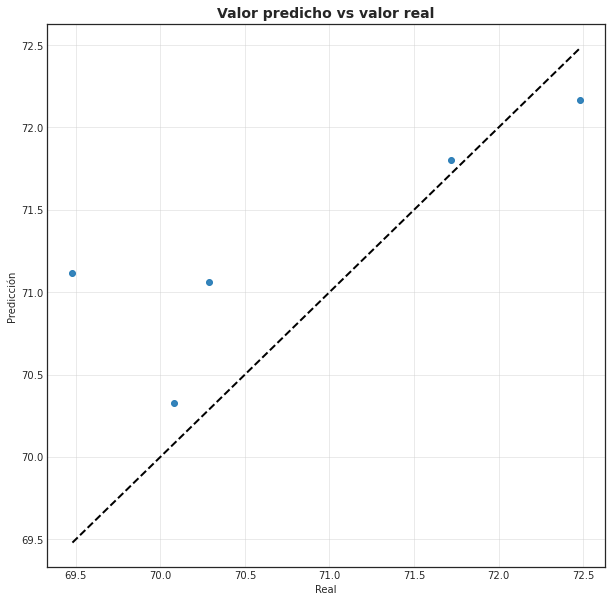

In [35]:
y_pred = lm.predict(X1_test)

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_test, pred_test, alpha = 0.9)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

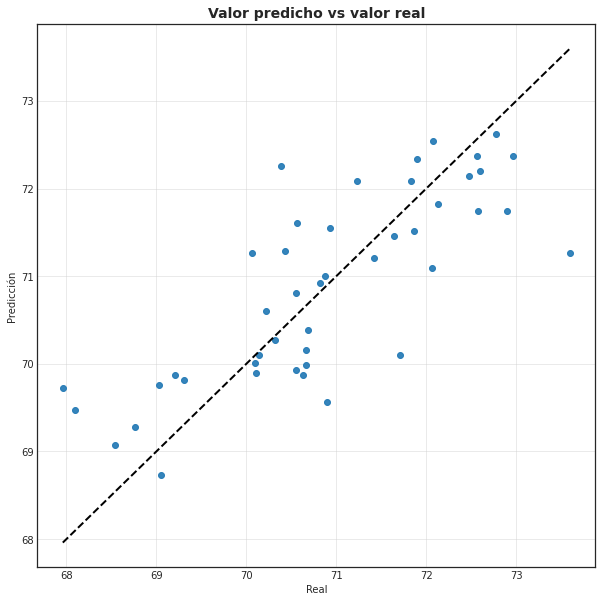

In [36]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, pred_train, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

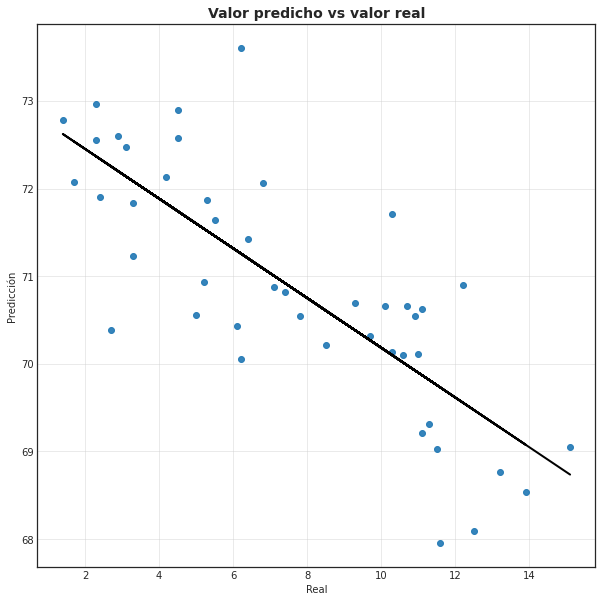

In [37]:
#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
#'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 
#'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(X_train, y_train, alpha = 0.9)
    plt.plot(X_train, pred_train, color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

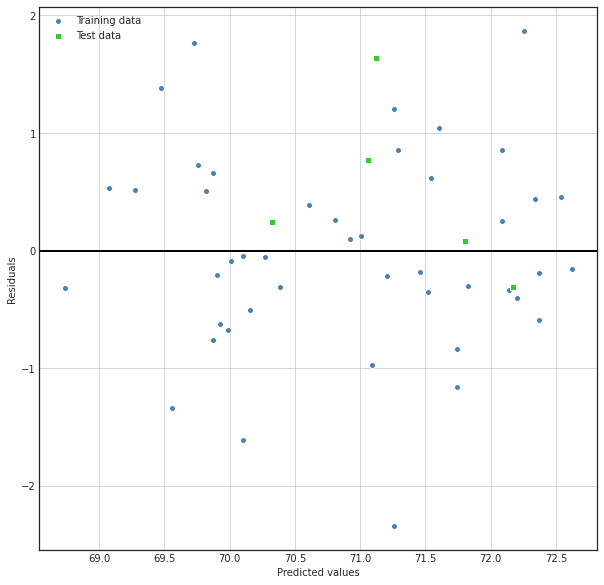

In [38]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(pred_train, pred_train - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(pred_test, pred_test - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.axhline(y = 0, linestyle = '-', color = 'black', lw=2)
    plt.grid()
plt.show()

In [39]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, pred_train),mean_squared_error(y_test, pred_test)))

MSE train: 0.692, test: 0.690


In [40]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, pred_train),r2_score(y_test, pred_test)))

R^2 train: 0.621, test: 0.443


Elaborado por Jairo Rojas